
# Loading

In [1]:
import sys
import numpy as np
import scipy
import pandas as pd
from matplotlib import pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')
import seaborn
from sklearn import preprocessing
from sklearn.externals import joblib

%matplotlib inline
%load_ext autoreload
%autoreload 2

sys.path.append('../')
from data_mining import *

In [2]:
pd.set_option('display.notebook_repr_html', True)

def _repr_latex_(self):
    return "\centering{%s}" % self.to_latex()

pd.DataFrame._repr_latex_ = _repr_latex_  # monkey patch pandas DataFrame

In [3]:
def load_RW_scores(path):
    rw_scores = pd.read_csv(path, sep='\s+', names=['name', '_', '_', '_', 'score', '_'], usecols=[0, 4])
    rw_scores.index = np.array(rw_scores.name)
    del rw_scores['name']
    rw_scores = rw_scores[~rw_scores['score'].isnull()]
    rw_scores = pd.Series(rw_scores.score)
    return rw_scores

def load_scores(path):
    scores = []
    for protein_dir in glob.glob(path + '/*'):
        scores.append(pd.read_table(protein_dir + '/scores.txt', index_col='NAME'))
        scores[-1].index = pd.Series(scores[-1].iloc[:, 0].index).apply(lambda x: protein_dir.split('/')[-1] + '/' + x)
    scores = pd.concat(scores)
    return scores

## Load all scores

In [4]:
columns = pd.DataFrame.from_csv('moulder_decoys_scores.txt', index_col=None, header=None)[1:28].iloc[:, 0].apply(lambda x: x.split('.  ')[1]).values
scores = pd.read_csv('moulder_decoys_scores.txt', index_col=None, header=None, delim_whitespace=True, skiprows=28)
scores.columns = columns
scores.index = scores['Model_Name'].apply(lambda x: '{}/{}{}.pdb'.format(x.split('_')[0], x.split('_')[1], int(x.split('_')[2])))
del scores['Model_Name']
scores.head()

RMSD  Native_Overlap_3.5  Anolea_PUC  Anolea_PE  Anolea_Z  \
Model_Name                                                                     
1bbh/model2.pdb  3.2202              0.7008       56.69     9144.0     160.0   
1bbh/model3.pdb  2.5317              0.8661       70.08     9382.0     274.0   
1bbh/model4.pdb  2.5079              0.8740       58.27     9454.0     158.0   
1bbh/model5.pdb  2.7669              0.8189       71.65     9396.0     290.0   
1bbh/model6.pdb  2.8837              0.7795       59.06     9362.0     158.0   

                 MP_COMBI   DFIRE  PSIPRED_WEIGHT  PSIPRED_PERCENT  \
Model_Name                                                           
1bbh/model2.pdb   -7.4556 -126.10           5.835           0.1024   
1bbh/model3.pdb   -9.7827 -130.60           6.331           0.1339   
1bbh/model4.pdb   -7.4509 -133.57           7.157           0.1496   
1bbh/model5.pdb   -7.9694 -130.54           5.803           0.0945   
1bbh/model6.pdb   -7.6009 -128.21           7.622           0.1496   

                       EEF1   ...      MODCHECK   MP_PAIR  PROSA_COMB  \
Model_Name                    ...                                       
1bbh/model2.pdb -3682.38887   ...      9.273006 -145.1898      -145.0   
1bbh/model3.pdb -3670.32837   ...     13.113309 -168.3061      -225.0   
1bbh/model4.pdb -3645.32136   ...     11.370114 -118.3170      -176.0   
1bbh/model5.pdb -3676.81610   ...     10.479931 -146.3868      -178.0   
1bbh/model6.pdb -3653.44189   ...     10.658768 -135.9661      -168.0   

                 PROSA_PAIR  PROSA_SURF      SIFT  SOLVX  MP_SURF  SVM_SCORE  \
Model_Name                                                                     
1bbh/model2.pdb       -94.0       -52.0  2.193138  -32.7  -6.7747   3.553975   
1bbh/model3.pdb      -131.0       -94.0  1.608776  -80.1 -11.8652   2.755737   
1bbh/model4.pdb      -111.0       -65.0  0.539999  -83.0 -10.1305   3.437895   
1bbh/model5.pdb      -108.0       -70.0  1.582288  -63.2  -8.8078   3.203652   
1bbh/model6.pdb      -106.0       -62.0  1.227032  -67.7  -8.3425   3.772927   

                 ROSETTA  
Model_Name                
1bbh/model2.pdb     2.62  
1bbh/model3.pdb   -44.96  
1bbh/model4.pdb   -32.80  
1bbh/model5.pdb   -13.26  
1bbh/model6.pdb   -27.02  

[5 rows x 26 columns]

## Load RW scores

In [5]:
rw_scores = load_RW_scores('RWplus/modeller.txt')
rw_scores.index = pd.Series(rw_scores.index).apply(lambda x: '/'.join(x.split('/')[-2:]))
rw_scores.head()

4sbv/model61.pdb    -30630.670463
4sbv/model145.pdb   -28016.743259
4sbv/model139.pdb   -28545.143354
4sbv/model205.pdb   -27498.097997
4sbv/model286.pdb   -27457.850678
Name: score, dtype: float64

In [6]:
scores['RWplus'] = rw_scores

## Load my scores

In [7]:
my_scores = pd.Series.from_csv('MY/modeller.txt', sep='\s+')
my_scores.index = pd.Series(my_scores.index).apply(lambda x: '/'.join(x.split('/')[-2:]))
my_scores.head()

4sbv/model61.pdb     1.317571
4sbv/model145.pdb    1.304738
4sbv/model139.pdb    1.362800
4sbv/model205.pdb    1.231418
4sbv/model286.pdb    1.216022
dtype: float64

In [8]:
scores['SBROD'] = my_scores

In [9]:
my_scores = pd.Series.from_csv('MY/modeller_5_11.txt', sep='\s+')
my_scores.index = pd.Series(my_scores.index).apply(lambda x: '/'.join(x.split('/')[-2:]))
my_scores.head()

4sbv/model61.pdb     1.327831
4sbv/model145.pdb    1.310649
4sbv/model139.pdb    1.367581
4sbv/model205.pdb    1.239454
4sbv/model286.pdb    1.225056
dtype: float64

In [10]:
scores['SBROD_5_11'] = my_scores

In [11]:
my_scores = pd.Series.from_csv('MY/modeller_5_11_NMA.txt', sep='\s+')
my_scores.index = pd.Series(my_scores.index).apply(lambda x: '/'.join(x.split('/')[-2:]))
my_scores.head()

4sbv/model61.pdb     1.359092
4sbv/model145.pdb    1.332501
4sbv/model139.pdb    1.398540
4sbv/model205.pdb    1.269807
4sbv/model286.pdb    1.257989
dtype: float64

In [12]:
scores['SBROD_5_11_NMA'] = my_scores

## Load metrics

In [13]:
metrics = load_scores('/home/m.karasikov/datasets/ModellerSet_original')
metrics.head()

RMSD  TM-score  MaxSub-score  GDT-TS-score  GDT-HA-score  \
NAME                                                                            
4sbv/model10.pdb   16.186    0.6041        0.5411        0.5285        0.3925   
4sbv/model100.pdb  16.347    0.5229        0.4301        0.4262        0.2992   
4sbv/model101.pdb  15.662    0.5074        0.3842        0.4054        0.2681   
4sbv/model102.pdb  12.808    0.5213        0.4014        0.4158        0.2850   
4sbv/model103.pdb  17.845    0.4984        0.4157        0.4184        0.2992   

                   RMSD-backwards  TM-score-backwards  MaxSub-score-backwards  \
NAME                                                                            
4sbv/model10.pdb           16.186              0.6041                  0.5411   
4sbv/model100.pdb          16.347              0.5229                  0.4301   
4sbv/model101.pdb          15.662              0.5074                  0.3842   
4sbv/model102.pdb          12.808              0.5213                  0.4014   
4sbv/model103.pdb          17.845              0.4984                  0.4157   

                   GDT-TS-score-backwards  GDT-HA-score-backwards  
NAME                                                               
4sbv/model10.pdb                   0.5285                  0.3925  
4sbv/model100.pdb                  0.4262                  0.2992  
4sbv/model101.pdb                  0.4054                  0.2681  
4sbv/model102.pdb                  0.4158                  0.2850  
4sbv/model103.pdb                  0.4184                  0.2992

In [14]:
scores[metrics.columns[1:metrics.shape[1] // 2]] = metrics.iloc[:, 1:metrics.shape[1] // 2]

# Evaluation

In [15]:
scores.head()

RMSD  Native_Overlap_3.5  Anolea_PUC  Anolea_PE  Anolea_Z  \
Model_Name                                                                     
1bbh/model2.pdb  3.2202              0.7008       56.69     9144.0     160.0   
1bbh/model3.pdb  2.5317              0.8661       70.08     9382.0     274.0   
1bbh/model4.pdb  2.5079              0.8740       58.27     9454.0     158.0   
1bbh/model5.pdb  2.7669              0.8189       71.65     9396.0     290.0   
1bbh/model6.pdb  2.8837              0.7795       59.06     9362.0     158.0   

                 MP_COMBI   DFIRE  PSIPRED_WEIGHT  PSIPRED_PERCENT  \
Model_Name                                                           
1bbh/model2.pdb   -7.4556 -126.10           5.835           0.1024   
1bbh/model3.pdb   -9.7827 -130.60           6.331           0.1339   
1bbh/model4.pdb   -7.4509 -133.57           7.157           0.1496   
1bbh/model5.pdb   -7.9694 -130.54           5.803           0.0945   
1bbh/model6.pdb   -7.6009 -128.21           7.622           0.1496   

                       EEF1      ...       SVM_SCORE  ROSETTA        RWplus  \
Model_Name                       ...                                          
1bbh/model2.pdb -3682.38887      ...        3.553975     2.62 -18499.042329   
1bbh/model3.pdb -3670.32837      ...        2.755737   -44.96 -19309.634613   
1bbh/model4.pdb -3645.32136      ...        3.437895   -32.80 -19481.884135   
1bbh/model5.pdb -3676.81610      ...        3.203652   -13.26 -19029.555795   
1bbh/model6.pdb -3653.44189      ...        3.772927   -27.02 -18868.409797   

                    SBROD  SBROD_5_11  SBROD_5_11_NMA  TM-score  MaxSub-score  \
Model_Name                                                                      
1bbh/model2.pdb  1.335695    1.337509        1.363915    0.7116        0.5541   
1bbh/model3.pdb  1.385119    1.383881        1.420040    0.8077        0.7223   
1bbh/model4.pdb  1.329424    1.333434        1.376115    0.8076        0.7171   
1bbh/model5.pdb  1.334525    1.336612        1.376849    0.7835        0.6794   
1bbh/model6.pdb  1.335392    1.338208        1.376924    0.7771        0.6646   

                 GDT-TS-score  GDT-HA-score  
Model_Name                                   
1bbh/model2.pdb        0.6201        0.4134  
1bbh/model3.pdb        0.7539        0.5472  
1bbh/model4.pdb        0.7421        0.5295  
1bbh/model5.pdb        0.7106        0.5059  
1bbh/model6.pdb        0.7283        0.5256  

[5 rows x 34 columns]

In [16]:
df = scores.RMSD - metrics.RMSD

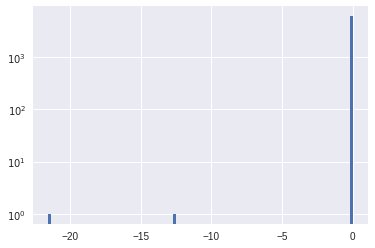

In [17]:
plt.hist(df[df.notnull()], bins=100, log=True)
plt.show()

In [18]:
scores.shape

(6000, 34)

In [19]:
scores.isnull().sum().sum()

0

In [20]:
X = np.array(scores.index).reshape(-1, 1)

In [21]:
scores[['GA341',
        'SBROD_5_11_NMA',
        'SBROD_5_11',
        'SBROD',
        'SIFT',
        'MODCHECK',
        'Xd',
        'Anolea_PE',
        'Native_Overlap_3.5']] *= -1

## GDT-TS as reference score

In [38]:
df = results[['Mean loss score', 'Mean Pearson', 'Mean Spearman', 'Mean Kendall tau']].sort_values('Mean Pearson')
df[['Mean Pearson', 'Mean Spearman', 'Mean Kendall tau']] *= -1
print(df.astype(float).round(3).to_latex())

In [22]:
metric = 'GDT-TS-score'

records, methods = [], []
for method in set(scores.columns) - {'RMSD', 'GDT-TS-score', 'TM-score', 'GDT-HA-score', 'MaxSub-score', metric}:
    records.append(scoring_results(X, scores[list(set(scores.columns) - {method})], lambda indices: scores.loc[indices.ravel(), method].values, num_plots=0)[0][metric])
    methods.append(method)

results = pd.concat(records, axis=1)
results.columns = methods
results = results.T
results.sort_values('Mean Pearson')

Mean rank of the native Top 1 Top 5 Mean score for top 1  \
SVM_SCORE                             9.55   0.1  0.45             0.676175   
SBROD_5_11_NMA                       12.05   0.1  0.25              0.65779   
Native_Overlap_3.5                    2.55   0.6   0.8             0.690985   
PSIPRED_WEIGHT                       12.85  0.15  0.35              0.65875   
SBROD_5_11                            13.9  0.05  0.15             0.654005   
SBROD                                13.55  0.05   0.2              0.64412   
PSIPRED_PERCENT                      13.45  0.15   0.3             0.649625   
PROSA_COMB                            11.3  0.15   0.4             0.659535   
MODCHECK                              16.5     0   0.2              0.64736   
DOPE_AA                               12.5   0.2  0.35             0.665365   
MP_COMBI                             19.25     0  0.25             0.648915   
PROSA_SURF                           18.25   0.1   0.3              0.63425   
ROSETTA                              18.75   0.1   0.1             0.657075   
MP_SURF                              22.15     0   0.2             0.628085   
RWplus                               15.15  0.05   0.3             0.644445   
DFIRE                                13.95   0.1  0.35             0.659475   
Xd                                    19.3   0.2  0.35             0.622045   
GA341                                 23.3     0  0.15              0.62321   
SOLVX                                 32.7  0.05  0.15             0.599525   
PROSA_PAIR                           20.55  0.05   0.2             0.629385   
DOPE_BB                               19.6   0.1   0.2              0.64643   
MP_PAIR                              26.65  0.05   0.1             0.619565   
FRST                                 19.25  0.05  0.25             0.598925   
Anolea_PUC                           45.45     0   0.1               0.5762   
Anolea_Z                             35.85  0.05  0.15              0.60255   
GB                                    34.1     0   0.1             0.643635   
EEF1                                  25.2  0.05  0.25             0.645545   
SIFT                                  90.3     0  0.05             0.479165   
Anolea_PE                            120.8     0     0             0.245745   

                   Mean loss score Mean Pearson Mean Spearman  \
SVM_SCORE                 0.023025    -0.937832     -0.934975   
SBROD_5_11_NMA             0.04141    -0.926574     -0.920094   
Native_Overlap_3.5        0.008215    -0.921954     -0.922379   
PSIPRED_WEIGHT             0.04045    -0.919125     -0.910394   
SBROD_5_11                0.045195    -0.917196     -0.910274   
SBROD                      0.05508    -0.917175     -0.910702   
PSIPRED_PERCENT           0.049575    -0.909986     -0.900044   
PROSA_COMB                0.039665    -0.888939     -0.899567   
MODCHECK                   0.05184    -0.887662     -0.886868   
DOPE_AA                   0.033835    -0.886649      -0.90935   
MP_COMBI                  0.050285    -0.879057     -0.889434   
PROSA_SURF                 0.06495    -0.872732     -0.872678   
ROSETTA                   0.042125     -0.86803     -0.877626   
MP_SURF                   0.071115    -0.854932     -0.864002   
RWplus                    0.054755    -0.846541     -0.871368   
DFIRE                     0.039725    -0.846134     -0.882742   
Xd                        0.077155    -0.838129     -0.834589   
GA341                      0.07599    -0.837692      -0.91267   
SOLVX                     0.099675    -0.814532     -0.809785   
PROSA_PAIR                0.069815    -0.799451     -0.817607   
DOPE_BB                    0.05277     -0.79776     -0.825821   
MP_PAIR                   0.079635    -0.792826     -0.811585   
FRST                      0.100275    -0.761237     -0.772626   
Anolea_PUC                   0.123    -0.682448     -0.666761   
Anolea_Z               

limit_output extension: Maximum message size of 10000 exceeded with 10563 characters

In [24]:
results.sort_values('Mean loss score')

Mean rank of the native Top 1 Top 5 Mean score for top 1  \
Native_Overlap_3.5                    2.55   0.6   0.8             0.690985   
SVM_SCORE                             9.55   0.1  0.45             0.676175   
DOPE_AA                               12.5   0.2  0.35             0.665365   
PROSA_COMB                            11.3  0.15   0.4             0.659535   
DFIRE                                13.95   0.1  0.35             0.659475   
PSIPRED_WEIGHT                       12.85  0.15  0.35              0.65875   
SBROD_5_11_NMA                       12.05   0.1  0.25              0.65779   
ROSETTA                              18.75   0.1   0.1             0.657075   
SBROD_5_11                            13.9  0.05  0.15             0.654005   
PSIPRED_PERCENT                      13.45  0.15   0.3             0.649625   
MP_COMBI                             19.25     0  0.25             0.648915   
MODCHECK                              16.5     0   0.2              0.64736   
DOPE_BB                               19.6   0.1   0.2              0.64643   
EEF1                                  25.2  0.05  0.25             0.645545   
RWplus                               15.15  0.05   0.3             0.644445   
SBROD                                13.55  0.05   0.2              0.64412   
GB                                    34.1     0   0.1             0.643635   
PROSA_SURF                           18.25   0.1   0.3              0.63425   
PROSA_PAIR                           20.55  0.05   0.2             0.629385   
MP_SURF                              22.15     0   0.2             0.628085   
GA341                                 23.3     0  0.15              0.62321   
Xd                                    19.3   0.2  0.35             0.622045   
MP_PAIR                              26.65  0.05   0.1             0.619565   
Anolea_Z                             35.85  0.05  0.15              0.60255   
SOLVX                                 32.7  0.05  0.15             0.599525   
FRST                                 19.25  0.05  0.25             0.598925   
Anolea_PUC                           45.45     0   0.1               0.5762   
SIFT                                  90.3     0  0.05             0.479165   
Anolea_PE                            120.8     0     0             0.245745   

                   Mean loss score Mean Pearson Mean Spearman  \
Native_Overlap_3.5        0.008215    -0.921954     -0.922672   
SVM_SCORE                 0.023025    -0.937832     -0.934963   
DOPE_AA                   0.033835    -0.886649     -0.909418   
PROSA_COMB                0.039665    -0.888939     -0.899695   
DFIRE                     0.039725    -0.846134     -0.882709   
PSIPRED_WEIGHT             0.04045    -0.919125     -0.910365   
SBROD_5_11_NMA             0.04141    -0.926574     -0.920048   
ROSETTA                   0.042125     -0.86803     -0.877536   
SBROD_5_11                0.045195    -0.917196     -0.910301   
PSIPRED_PERCENT           0.049575    -0.909986     -0.900147   
MP_COMBI                  0.050285    -0.879057     -0.889389   
MODCHECK                   0.05184    -0.887662     -0.886922   
DOPE_BB                    0.05277     -0.79776     -0.825675   
EEF1                      0.053655    -0.534673     -0.791142   
RWplus                    0.054755    -0.846541     -0.871446   
SBROD                      0.05508    -0.917175     -0.910642   
GB                        0.055565    -0.583729     -0.794084   
PROSA_SURF                 0.06495    -0.872732     -0.872877   
PROSA_PAIR                0.069815    -0.799451     -0.817768   
MP_SURF                   0.071115    -0.854932     -0.863998   
GA341                      0.07599    -0.837692     -0.912062   
Xd                        0.077155    -0.838129      -0.83452   
MP_PAIR                   0.079635    -0.792826     -0.811632   
Anolea_Z                   0.09665    -0.592191     -0.645428   
SOLVX                  

## TM-score as reference score

In [25]:
metric = 'TM-score'

records, methods = [], []
for method in set(scores.columns) - {'RMSD', 'GDT-TS-score', 'TM-score', 'GDT-HA-score', 'MaxSub-score', metric}:
    records.append(scoring_results(X, scores[list(set(scores.columns) - {method})], lambda indices: scores.loc[indices.ravel(), method].values, num_plots=0)[0][metric])
    methods.append(method)

results = pd.concat(records, axis=1)
results.columns = methods
results = results.T
results.sort_values('Mean Pearson')

Mean rank of the native Top 1 Top 5 Mean score for top 1  \
SVM_SCORE                              9.5   0.1   0.5              0.77838   
SBROD_5_11_NMA                       10.75  0.15  0.35             0.760185   
Native_Overlap_3.5                    2.45   0.5   0.8              0.79353   
PSIPRED_WEIGHT                        16.1   0.1   0.3              0.76175   
SBROD                                 13.1   0.1  0.25             0.745575   
SBROD_5_11                            12.8   0.1   0.2             0.755605   
PSIPRED_PERCENT                      15.95   0.1  0.25              0.75318   
PROSA_COMB                            8.95   0.2  0.45              0.76088   
DOPE_AA                              10.95  0.15  0.35             0.770735   
MODCHECK                             14.05  0.05   0.3             0.748475   
MP_COMBI                             14.75  0.05   0.4              0.75057   
PROSA_SURF                            13.8   0.1   0.3             0.737655   
ROSETTA                               16.3   0.1  0.15              0.75825   
MP_SURF                               21.9  0.05   0.3              0.72755   
RWplus                                14.2   0.1   0.3             0.745815   
DFIRE                                 12.1  0.15  0.35              0.76496   
Xd                                    16.8  0.25   0.4             0.719435   
GA341                                17.75     0  0.25              0.72568   
SOLVX                                 38.4     0  0.05             0.697645   
DOPE_BB                              21.35   0.1   0.2              0.74908   
PROSA_PAIR                           15.95  0.05   0.2              0.73004   
MP_PAIR                              19.95  0.05  0.25             0.723115   
FRST                                  12.4  0.05   0.4             0.695505   
Anolea_PUC                            48.7     0   0.1             0.679975   
Anolea_Z                             34.05  0.05   0.2             0.702405   
GB                                    34.3     0   0.1              0.74386   
EEF1                                 29.35   0.1   0.3              0.74919   
SIFT                                 94.45     0  0.05              0.56897   
Anolea_PE                            119.7     0     0             0.321895   

                   Mean loss score Mean Pearson Mean Spearman  \
SVM_SCORE                 0.023085    -0.937508     -0.934112   
SBROD_5_11_NMA             0.04128    -0.924021     -0.917467   
Native_Overlap_3.5        0.007935    -0.923478     -0.925286   
PSIPRED_WEIGHT            0.039715    -0.920347      -0.90998   
SBROD                      0.05589    -0.914757     -0.907982   
SBROD_5_11                 0.04586    -0.914622     -0.907369   
PSIPRED_PERCENT           0.048285     -0.91056     -0.899426   
PROSA_COMB                0.040585    -0.886465     -0.897979   
DOPE_AA                    0.03073    -0.884653     -0.907127   
MODCHECK                   0.05299    -0.884558     -0.885246   
MP_COMBI                  0.050895    -0.875974     -0.887133   
PROSA_SURF                 0.06381     -0.87203     -0.872224   
ROSETTA                   0.043215    -0.866475     -0.875186   
MP_SURF                   0.073915    -0.854147     -0.863969   
RWplus                     0.05565    -0.846219     -0.870346   
DFIRE                     0.036505     -0.84505     -0.881444   
Xd                         0.08203    -0.835643      -0.83173   
GA341                     0.075785    -0.833714     -0.910381   
SOLVX                      0.10382    -0.812193     -0.807742   
DOPE_BB                   0.052385    -0.796672     -0.823206   
PROSA_PAIR                0.071425    -0.795202     -0.815077   
MP_PAIR                    0.07835    -0.788626     -0.807661   
FRST                       0.10596    -0.757012     -0.771139   
Anolea_PUC                 0.12149    -0.683184     -0.666402   
Anolea_Z               

In [26]:
results.sort_values('Mean loss score')

Mean rank of the native Top 1 Top 5 Mean score for top 1  \
Native_Overlap_3.5                    2.45   0.5   0.8              0.79353   
SVM_SCORE                              9.5   0.1   0.5              0.77838   
DOPE_AA                              10.95  0.15  0.35             0.770735   
DFIRE                                 12.1  0.15  0.35              0.76496   
PSIPRED_WEIGHT                        16.1   0.1   0.3              0.76175   
PROSA_COMB                            8.95   0.2  0.45              0.76088   
SBROD_5_11_NMA                       10.75  0.15  0.35             0.760185   
ROSETTA                               16.3   0.1  0.15              0.75825   
SBROD_5_11                            12.8   0.1   0.2             0.755605   
PSIPRED_PERCENT                      15.95   0.1  0.25              0.75318   
MP_COMBI                             14.75  0.05   0.4              0.75057   
EEF1                                 29.35   0.1   0.3              0.74919   
DOPE_BB                              21.35   0.1   0.2              0.74908   
MODCHECK                             14.05  0.05   0.3             0.748475   
RWplus                                14.2   0.1   0.3             0.745815   
SBROD                                 13.1   0.1  0.25             0.745575   
GB                                    34.3     0   0.1              0.74386   
PROSA_SURF                            13.8   0.1   0.3             0.737655   
PROSA_PAIR                           15.95  0.05   0.2              0.73004   
MP_SURF                               21.9  0.05   0.3              0.72755   
GA341                                17.75     0  0.25              0.72568   
MP_PAIR                              19.95  0.05  0.25             0.723115   
Xd                                    16.8  0.25   0.4             0.719435   
Anolea_Z                             34.05  0.05   0.2             0.702405   
SOLVX                                 38.4     0  0.05             0.697645   
FRST                                  12.4  0.05   0.4             0.695505   
Anolea_PUC                            48.7     0   0.1             0.679975   
SIFT                                 94.45     0  0.05              0.56897   
Anolea_PE                            119.7     0     0             0.321895   

                   Mean loss score Mean Pearson Mean Spearman  \
Native_Overlap_3.5        0.007935    -0.923478     -0.925286   
SVM_SCORE                 0.023085    -0.937508     -0.934112   
DOPE_AA                    0.03073    -0.884653     -0.907127   
DFIRE                     0.036505     -0.84505     -0.881444   
PSIPRED_WEIGHT            0.039715    -0.920347      -0.90998   
PROSA_COMB                0.040585    -0.886465     -0.897979   
SBROD_5_11_NMA             0.04128    -0.924021     -0.917467   
ROSETTA                   0.043215    -0.866475     -0.875186   
SBROD_5_11                 0.04586    -0.914622     -0.907369   
PSIPRED_PERCENT           0.048285     -0.91056     -0.899426   
MP_COMBI                  0.050895    -0.875974     -0.887133   
EEF1                      0.052275    -0.534487     -0.786814   
DOPE_BB                   0.052385    -0.796672     -0.823206   
MODCHECK                   0.05299    -0.884558     -0.885246   
RWplus                     0.05565    -0.846219     -0.870346   
SBROD                      0.05589    -0.914757     -0.907982   
GB                        0.057605    -0.582774     -0.789055   
PROSA_SURF                 0.06381     -0.87203     -0.872224   
PROSA_PAIR                0.071425    -0.795202     -0.815077   
MP_SURF                   0.073915    -0.854147     -0.863969   
GA341                     0.075785    -0.833714     -0.910381   
MP_PAIR                    0.07835    -0.788626     -0.807661   
Xd                         0.08203    -0.835643      -0.83173   
Anolea_Z                   0.09906    -0.590024     -0.642436   
SOLVX                  

## RMSD as reference score

In [48]:
df = results[['Mean loss score', 'Mean Pearson', 'Mean Spearman', 'Mean Kendall tau']].sort_values('Mean Pearson', ascending=False)
df[['Mean Pearson', 'Mean Spearman', 'Mean Kendall tau']] *= -1
df *= -1
print(df.astype(float).round(3).to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  Mean loss score &  Mean Pearson &  Mean Spearman &  Mean Kendall tau \\
\midrule
Native\_Overlap\_3.5 &            0.099 &         0.901 &          0.905 &             0.751 \\
SVM\_SCORE          &            0.601 &         0.874 &          0.881 &             0.696 \\
DOPE\_AA            &            0.675 &         0.870 &          0.872 &             0.690 \\
SBROD\_5\_11\_NMA     &            0.890 &         0.866 &          0.868 &             0.682 \\
PSIPRED\_WEIGHT     &            0.792 &         0.858 &          0.865 &             0.672 \\
SBROD              &            1.312 &         0.855 &          0.860 &             0.673 \\
SBROD\_5\_11         &            1.222 &         0.854 &          0.859 &             0.671 \\
PSIPRED\_PERCENT    &            0.919 &         0.847 &          0.855 &             0.661 \\
DFIRE              &            0.692 &         0.847 &          0.859 &             0.677 \\
ROSETTA            &    

In [45]:
metric = 'RMSD'

records, methods = [], []
for method in set(scores.columns) - {'RMSD', 'GDT-TS-score', 'TM-score', 'GDT-HA-score', 'MaxSub-score', metric}:
    records.append(scoring_results(X, scores[list(set(scores.columns) - {method})], lambda indices: scores.loc[indices.ravel(), method].values, num_plots=0)[0][metric])
    methods.append(method)

results = pd.concat(records, axis=1)
results.columns = methods
results = results.T
results.sort_values('Mean Pearson', ascending=False)

Mean rank of the native Top 1 Top 5 Mean score for top 1  \
Native_Overlap_3.5                     2.8  0.45  0.75              3.42385   
SVM_SCORE                            13.15   0.1   0.5              3.92507   
DOPE_AA                              13.35   0.1   0.3              3.99906   
SBROD_5_11_NMA                        14.3  0.05   0.2              4.21473   
PSIPRED_WEIGHT                       15.65   0.1   0.4              4.11649   
SBROD                                 16.4     0   0.1               4.6363   
SBROD_5_11                              16     0   0.1              4.54612   
PSIPRED_PERCENT                      17.85   0.1  0.25              4.24382   
DFIRE                                14.15  0.15  0.35              4.01691   
ROSETTA                               16.2  0.15  0.15              4.19222   
RWplus                               15.95   0.1   0.3              4.59607   
PROSA_COMB                            12.7   0.1   0.3              4.16853   
MP_COMBI                             23.45  0.05  0.35              4.55518   
MODCHECK                             23.15     0   0.2              4.36997   
PROSA_SURF                           16.75  0.05   0.3              4.36939   
MP_SURF                               26.7  0.05   0.3              5.13589   
DOPE_BB                              27.15  0.15  0.25              4.44321   
GA341                                 26.7     0   0.2              4.92872   
SOLVX                                32.85     0  0.05              5.75542   
Xd                                   20.55  0.15  0.25              5.06562   
PROSA_PAIR                              21  0.05  0.15              5.28521   
MP_PAIR                              31.25  0.05   0.2              5.09485   
FRST                                  18.4  0.05  0.25              5.40588   
Anolea_PUC                            59.1     0  0.05              5.69279   
GB                                   37.25     0  0.05              4.88685   
Anolea_Z                              47.6  0.05   0.1              5.22774   
EEF1                                  36.5     0   0.1              4.71049   
SIFT                                 95.85     0  0.05              9.37627   
Anolea_PE                            116.2     0     0              14.0721   

                   Mean loss score Mean Pearson Mean Spearman  \
Native_Overlap_3.5       -0.099375     0.901017      0.904601   
SVM_SCORE                  -0.6006     0.874072      0.881469   
DOPE_AA                   -0.67459     0.869985      0.871651   
SBROD_5_11_NMA            -0.89026      0.86554      0.867783   
PSIPRED_WEIGHT           -0.792025     0.857853      0.864632   
SBROD                     -1.31182     0.854977      0.860249   
SBROD_5_11                -1.22164     0.854355      0.859476   
PSIPRED_PERCENT           -0.91935     0.846969       0.85452   
DFIRE                     -0.69244     0.846706      0.859171   
ROSETTA                  -0.867755     0.846387      0.842615   
RWplus                     -1.2716      0.84581      0.852108   
PROSA_COMB                -0.84406     0.834998      0.838746   
MP_COMBI                  -1.23071     0.816101      0.822737   
MODCHECK                   -1.0455     0.806412      0.826594   
PROSA_SURF                -1.04492     0.802927      0.819031   
MP_SURF                   -1.81142     0.783359      0.809415   
DOPE_BB                   -1.11874     0.783042      0.786671   
GA341                     -1.60425     0.768137      0.848822   
SOLVX                     -2.43095     0.753173      0.762103   
Xd                        -1.74115     0.752949      0.769989   
PROSA_PAIR                -1.96074     0.747614      0.752247   
MP_PAIR                   -1.77038     0.730483      0.739356   
FRST                      -2.08141        0.693      0.699216   
Anolea_PUC                -2.36832     0.672642      0.645352   
GB                     

limit_output extension: Maximum message size of 10000 exceeded with 10363 characters

In [28]:
results.sort_values('Mean loss score', ascending=False)

Mean rank of the native Top 1 Top 5 Mean score for top 1  \
Native_Overlap_3.5                     2.8  0.45  0.75              3.42385   
SVM_SCORE                            13.15   0.1   0.5              3.92507   
DOPE_AA                              13.35   0.1   0.3              3.99906   
DFIRE                                14.15  0.15  0.35              4.01691   
PSIPRED_WEIGHT                       15.65   0.1   0.4              4.11649   
PROSA_COMB                            12.7   0.1   0.3              4.16853   
ROSETTA                               16.2  0.15  0.15              4.19222   
SBROD_5_11_NMA                        14.3  0.05   0.2              4.21473   
PSIPRED_PERCENT                      17.85   0.1  0.25              4.24382   
PROSA_SURF                           16.75  0.05   0.3              4.36939   
MODCHECK                             23.15     0   0.2              4.36997   
DOPE_BB                              27.15  0.15  0.25              4.44321   
SBROD_5_11                              16     0   0.1              4.54612   
MP_COMBI                             23.45  0.05  0.35              4.55518   
RWplus                               15.95   0.1   0.3              4.59607   
SBROD                                 16.4     0   0.1               4.6363   
EEF1                                  36.5     0   0.1              4.71049   
GB                                   37.25     0  0.05              4.88685   
GA341                                 26.7     0   0.2              4.92872   
Xd                                   20.55  0.15  0.25              5.06562   
MP_PAIR                              31.25  0.05   0.2              5.09485   
MP_SURF                               26.7  0.05   0.3              5.13589   
Anolea_Z                              47.6  0.05   0.1              5.22774   
PROSA_PAIR                              21  0.05  0.15              5.28521   
FRST                                  18.4  0.05  0.25              5.40588   
Anolea_PUC                            59.1     0  0.05              5.69279   
SOLVX                                32.85     0  0.05              5.75542   
SIFT                                 95.85     0  0.05              9.37627   
Anolea_PE                            116.2     0     0              14.0721   

                   Mean loss score Mean Pearson Mean Spearman  \
Native_Overlap_3.5       -0.099375     0.901017      0.904431   
SVM_SCORE                  -0.6006     0.874072      0.881467   
DOPE_AA                   -0.67459     0.869985      0.871648   
DFIRE                     -0.69244     0.846706      0.859152   
PSIPRED_WEIGHT           -0.792025     0.857853      0.864602   
PROSA_COMB                -0.84406     0.834998      0.838794   
ROSETTA                  -0.867755     0.846387      0.842616   
SBROD_5_11_NMA            -0.89026      0.86554      0.867784   
PSIPRED_PERCENT           -0.91935     0.846969      0.854207   
PROSA_SURF                -1.04492     0.802927      0.819192   
MODCHECK                   -1.0455     0.806412      0.826596   
DOPE_BB                   -1.11874     0.783042       0.78667   
SBROD_5_11                -1.22164     0.854355      0.859482   
MP_COMBI                  -1.23071     0.816101      0.822737   
RWplus                     -1.2716      0.84581      0.852106   
SBROD                     -1.31182     0.854977      0.860246   
EEF1                      -1.38603     0.576861      0.757997   
GB                        -1.56238     0.619932      0.750849   
GA341                     -1.60425     0.768137      0.847852   
Xd                        -1.74115     0.752949      0.769976   
MP_PAIR                   -1.77038     0.730483      0.739348   
MP_SURF                   -1.81142     0.783359      0.809418   
Anolea_Z                  -1.90327     0.587893      0.615298   
PROSA_PAIR                -1.96074     0.747614      0.752231   
FRST                   